In [442]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime

In [443]:
df=pd.read_csv("2019_.csv",encoding='CP949')
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


In [444]:
df.columns = ['datetime', 'exp', 'mcode', 'pcode', 'name', 'type', 'price', 'amount']
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [445]:
df["exp"]=df["exp"].fillna(method='ffill')
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [446]:
dfformless = df[df['type'] == "무형"]
dfformless

,datetime,exp,mcode,pcode,name,type,price,amount
2318,2019-01-25 19:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
2845,2019-01-31 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
3332,2019-02-05 18:00,60.0,100507,201567,TCOM_처브치아보험,무형,-,NaN
6570,2019-03-09 0:00,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN
6571,2019-03-09 0:20,20.0,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,-,NaN
...,...,...,...,...,...,...,...,...
38304,2020-01-01 0:20,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38305,2020-01-01 0:40,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38306,2020-01-01 1:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,-,NaN
38307,2020-01-01 1:20,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,-,NaN


In [447]:
idx_fl = df[df['type'] == "무형"].index
df = df.drop(idx_fl)
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000"
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000"
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000"
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000"


In [448]:
# 판매단가 및 취급액 데이터 앞뒤공백제거
df['price']  = df['price'].str.strip()
df['amount']  = df['amount'].str.strip()
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,"148,000","10,157,000"
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,"178,000","50,929,000"
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,"168,000","104,392,000"
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,"158,000","13,765,000"


In [449]:
df['price']  = df['price'].str.replace(",","")
df['amount']  = df['amount'].str.replace(",","")
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000


In [450]:
df[['price','amount']] = df[['price','amount']].apply(pd.to_numeric)
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 6:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 6:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 6:20,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 6:20,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 6:40,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 0:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 0:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 0:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [451]:
#방송일시를 datetime object 로 변경
df['datetime'] = df['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M'))
df

,datetime,exp,mcode,pcode,name,type,price,amount
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0


In [452]:
df['sale'] = df['amount']/df['price']
df

,datetime,exp,mcode,pcode,name,type,price,amount,sale
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,68.628378
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.117978
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.380952
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.120253


In [453]:
df.isnull().sum() # 바뀐데이터 결측값

datetime       0
exp            0
mcode          0
pcode          0
name           0
type           0
price          0
amount      1993
sale        1993
dtype: int64

In [454]:
df=df.dropna(axis=0) #바뀐데이터 결측값 제거
df

,datetime,exp,mcode,pcode,name,type,price,amount,sale
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045
...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,68.628378
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.117978
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.380952
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,87.120253


In [455]:
df.isnull().sum()

datetime    0
exp         0
mcode       0
pcode       0
name        0
type        0
price       0
amount      0
sale        0
dtype: int64

In [456]:
# 방송일시(기준열), 노출시간, 마더코드, 상품군 (기준에 따라 합쳐질 때 변하지 않아야 할 열) 추출 
df_sample = df[['datetime','exp','mcode','type']]
df_sample

,datetime,exp,mcode,type
0,2019-01-01 06:00:00,20.0,100346,의류
1,2019-01-01 06:00:00,20.0,100346,의류
2,2019-01-01 06:20:00,20.0,100346,의류
3,2019-01-01 06:20:00,20.0,100346,의류
4,2019-01-01 06:40:00,20.0,100346,의류
...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,주방
38300,2020-01-01 00:00:00,20.0,100448,주방
38301,2020-01-01 00:00:00,20.0,100448,주방
38302,2020-01-01 00:00:00,20.0,100448,주방


In [457]:
df.groupby('datetime').price.mean()

datetime
2019-01-01 06:00:00      39900.0
2019-01-01 06:20:00      39900.0
2019-01-01 06:40:00      39900.0
2019-01-01 07:00:00      59000.0
2019-01-01 07:20:00      59000.0
                         ...    
2019-12-31 21:40:00    1429000.0
2019-12-31 22:00:00    1429000.0
2019-12-31 23:20:00     163000.0
2019-12-31 23:40:00     163000.0
2020-01-01 00:00:00     163000.0
Name: price, Length: 20566, dtype: float64

In [458]:
ddfs=df.groupby('datetime')['amount','sale'].sum().reset_index(level='datetime') #방송일시별로 모든 연속형 변수 합함.
ddfm=df.groupby('datetime').price.mean().reset_index(level='datetime')
ddf = pd.merge(ddfs,ddfm)
ddf
#ddf2=ddf.reset_index(level='datetime') # 방송일시별 취급액, 판매수량의 합, 방송일시(index)를 column으로 변환
#ddf2

c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,datetime,amount,sale,price
0,2019-01-01 06:00:00,6470000.0,162.155388,39900.0
1,2019-01-01 06:20:00,10217000.0,256.065163,39900.0
2,2019-01-01 06:40:00,16009000.0,401.228070,39900.0
3,2019-01-01 07:00:00,6819000.0,115.576271,59000.0
4,2019-01-01 07:20:00,15689000.0,265.915254,59000.0
...,...,...,...,...
20561,2019-12-31 21:40:00,67810000.0,48.240053,1429000.0
20562,2019-12-31 22:00:00,104917000.0,74.989813,1429000.0
20563,2019-12-31 23:20:00,15986000.0,95.197591,163000.0
20564,2019-12-31 23:40:00,36916000.0,225.725718,163000.0


In [459]:
# datetime별로 중복되는 행의 취급액과 판매수량이 합쳐졌지만, 중복되는 결과 나타남.
ddf2 = pd.merge(df_sample,ddf)
ddf2

,datetime,exp,mcode,type,amount,sale,price
0,2019-01-01 06:00:00,20.0,100346,의류,6470000.0,162.155388,39900.0
1,2019-01-01 06:00:00,20.0,100346,의류,6470000.0,162.155388,39900.0
2,2019-01-01 06:20:00,20.0,100346,의류,10217000.0,256.065163,39900.0
3,2019-01-01 06:20:00,20.0,100346,의류,10217000.0,256.065163,39900.0
4,2019-01-01 06:40:00,20.0,100346,의류,16009000.0,401.228070,39900.0
...,...,...,...,...,...,...,...
35374,2019-12-31 23:40:00,20.0,100448,주방,36916000.0,225.725718,163000.0
35375,2020-01-01 00:00:00,20.0,100448,주방,215694000.0,1309.538102,163000.0
35376,2020-01-01 00:00:00,20.0,100448,주방,215694000.0,1309.538102,163000.0
35377,2020-01-01 00:00:00,20.0,100448,주방,215694000.0,1309.538102,163000.0


In [460]:
# datetime을 기준으로 중복되는 행 제거.
ddf3=ddf2.drop_duplicates(['datetime'])
ddf3

,datetime,exp,mcode,type,amount,sale,price
0,2019-01-01 06:00:00,20.0,100346,의류,6470000.0,162.155388,39900.0
2,2019-01-01 06:20:00,20.0,100346,의류,10217000.0,256.065163,39900.0
4,2019-01-01 06:40:00,20.0,100346,의류,16009000.0,401.228070,39900.0
6,2019-01-01 07:00:00,20.0,100305,속옷,6819000.0,115.576271,59000.0
7,2019-01-01 07:20:00,20.0,100305,속옷,15689000.0,265.915254,59000.0
...,...,...,...,...,...,...,...
35363,2019-12-31 21:40:00,20.0,100155,가전,67810000.0,48.240053,1429000.0
35365,2019-12-31 22:00:00,20.0,100155,가전,104917000.0,74.989813,1429000.0
35367,2019-12-31 23:20:00,20.0,100448,주방,15986000.0,95.197591,163000.0
35371,2019-12-31 23:40:00,20.0,100448,주방,36916000.0,225.725718,163000.0


In [461]:
#시간 제외 데이터 추출하여 'date'변수로 할당
ddf3['date'] = ddf3['datetime'].dt.strftime('%Y%m%d%H')
ddf3

c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,datetime,exp,mcode,type,amount,sale,price,date
0,2019-01-01 06:00:00,20.0,100346,의류,6470000.0,162.155388,39900.0,2019010106
2,2019-01-01 06:20:00,20.0,100346,의류,10217000.0,256.065163,39900.0,2019010106
4,2019-01-01 06:40:00,20.0,100346,의류,16009000.0,401.228070,39900.0,2019010106
6,2019-01-01 07:00:00,20.0,100305,속옷,6819000.0,115.576271,59000.0,2019010107
7,2019-01-01 07:20:00,20.0,100305,속옷,15689000.0,265.915254,59000.0,2019010107
...,...,...,...,...,...,...,...,...
35363,2019-12-31 21:40:00,20.0,100155,가전,67810000.0,48.240053,1429000.0,2019123121
35365,2019-12-31 22:00:00,20.0,100155,가전,104917000.0,74.989813,1429000.0,2019123122
35367,2019-12-31 23:20:00,20.0,100448,주방,15986000.0,95.197591,163000.0,2019123123
35371,2019-12-31 23:40:00,20.0,100448,주방,36916000.0,225.725718,163000.0,2019123123


In [462]:
# 마더코드와 날짜, 가격에 따른 노출시간, 취급액, 판매수량의 합
mdf=ddf3.groupby(['date','mcode','type','price'])['exp','amount','sale'].sum()
mdf

c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


exp       amount         sale
date       mcode  type price                                    
2019010106 100346 의류   39900.0    60.0   32696000.0   819.448622
2019010107 100305 속옷   59000.0    60.0   47878000.0   811.491525
2019010108 100808 의류   59900.0    60.0   99736000.0  1665.041736
2019010109 100816 의류   79000.0    60.0   90973000.0  1151.556962
2019010110 100809 의류   79900.0    60.0  259678000.0  3250.037547
...                                ...          ...          ...
2019123121 100155 가전   1429000.0  40.0  117105000.0    83.127989
           100501 생활용품 333500.0   20.0  102836000.0   412.958864
2019123122 100155 가전   1429000.0  20.0  104917000.0    74.989813
2019123123 100448 주방   163000.0   40.0   52902000.0   320.923309
2020010100 100448 주방   163000.0   20.0  215694000.0  1309.538102

[8853 rows x 3 columns]

In [463]:
# index를 column으로 바꾸기
mdf2=mdf.reset_index(level=['date', 'mcode','type','price'])
mdf2

,date,mcode,type,price,exp,amount,sale
0,2019010106,100346,의류,39900.0,60.0,32696000.0,819.448622
1,2019010107,100305,속옷,59000.0,60.0,47878000.0,811.491525
2,2019010108,100808,의류,59900.0,60.0,99736000.0,1665.041736
3,2019010109,100816,의류,79000.0,60.0,90973000.0,1151.556962
4,2019010110,100809,의류,79900.0,60.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
8848,2019123121,100155,가전,1429000.0,40.0,117105000.0,83.127989
8849,2019123121,100501,생활용품,333500.0,20.0,102836000.0,412.958864
8850,2019123122,100155,가전,1429000.0,20.0,104917000.0,74.989813
8851,2019123123,100448,주방,163000.0,40.0,52902000.0,320.923309


In [464]:
# 위의 데이터는 방송일자만 고려함. 방송시간또한 고려해야하므로 datetime변수를 위 데이터와 merge해야함.
# 마더코드, date, 판매단가를 고려하여 방송일시 열을 합쳐야 함 - 세가지중 하나라도 빠지면 취급액과 판매수량이 달라짐.
ddf4=ddf3[['datetime','mcode','date','price']]
ddf4

,datetime,mcode,date,price
0,2019-01-01 06:00:00,100346,2019010106,39900.0
2,2019-01-01 06:20:00,100346,2019010106,39900.0
4,2019-01-01 06:40:00,100346,2019010106,39900.0
6,2019-01-01 07:00:00,100305,2019010107,59000.0
7,2019-01-01 07:20:00,100305,2019010107,59000.0
...,...,...,...,...
35363,2019-12-31 21:40:00,100155,2019123121,1429000.0
35365,2019-12-31 22:00:00,100155,2019123122,1429000.0
35367,2019-12-31 23:20:00,100448,2019123123,163000.0
35371,2019-12-31 23:40:00,100448,2019123123,163000.0


In [465]:
# 중복열을 기준으로 merge
ddf5 = pd.merge(ddf4,mdf2)
ddf5


,datetime,mcode,date,price,type,exp,amount,sale
0,2019-01-01 06:00:00,100346,2019010106,39900.0,의류,60.0,32696000.0,819.448622
1,2019-01-01 06:20:00,100346,2019010106,39900.0,의류,60.0,32696000.0,819.448622
2,2019-01-01 06:40:00,100346,2019010106,39900.0,의류,60.0,32696000.0,819.448622
3,2019-01-01 07:00:00,100305,2019010107,59000.0,속옷,60.0,47878000.0,811.491525
4,2019-01-01 07:20:00,100305,2019010107,59000.0,속옷,60.0,47878000.0,811.491525
...,...,...,...,...,...,...,...,...
20561,2019-12-31 21:40:00,100155,2019123121,1429000.0,가전,40.0,117105000.0,83.127989
20562,2019-12-31 22:00:00,100155,2019123122,1429000.0,가전,20.0,104917000.0,74.989813
20563,2019-12-31 23:20:00,100448,2019123123,163000.0,주방,40.0,52902000.0,320.923309
20564,2019-12-31 23:40:00,100448,2019123123,163000.0,주방,40.0,52902000.0,320.923309


In [466]:
# 마더코드, date, 판매단가가 중복되는 행만 제거하고 첫번째 행만 남게 함.
ddf6=ddf5.drop_duplicates(['mcode','date','price'])
ddf6

,datetime,mcode,date,price,type,exp,amount,sale
0,2019-01-01 06:00:00,100346,2019010106,39900.0,의류,60.0,32696000.0,819.448622
3,2019-01-01 07:00:00,100305,2019010107,59000.0,속옷,60.0,47878000.0,811.491525
6,2019-01-01 08:00:00,100808,2019010108,59900.0,의류,60.0,99736000.0,1665.041736
9,2019-01-01 09:00:00,100816,2019010109,79000.0,의류,60.0,90973000.0,1151.556962
12,2019-01-01 10:00:00,100809,2019010110,79900.0,의류,60.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...,...
20559,2019-12-31 21:00:00,100501,2019123121,333500.0,생활용품,20.0,102836000.0,412.958864
20560,2019-12-31 21:20:00,100155,2019123121,1429000.0,가전,40.0,117105000.0,83.127989
20562,2019-12-31 22:00:00,100155,2019123122,1429000.0,가전,20.0,104917000.0,74.989813
20563,2019-12-31 23:20:00,100448,2019123123,163000.0,주방,40.0,52902000.0,320.923309


In [467]:
#이제 쓸모없어진 date열 제거
del ddf6['date']

In [468]:
# 원래대로 열 재배치
ddf6 = ddf6[['datetime', 'exp', 'mcode', 'type', 'price', 'amount', 'sale']]
ddf6

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
20559,2019-12-31 21:00:00,20.0,100501,생활용품,333500.0,102836000.0,412.958864
20560,2019-12-31 21:20:00,40.0,100155,가전,1429000.0,117105000.0,83.127989
20562,2019-12-31 22:00:00,20.0,100155,가전,1429000.0,104917000.0,74.989813
20563,2019-12-31 23:20:00,40.0,100448,주방,163000.0,52902000.0,320.923309


In [469]:
for i in range(1,len(ddf6)):
    if ddf6['mcode'].iloc[i] == ddf6['mcode'].iloc[i-1] :
        ddf6['exp'].iloc[i-1] = ddf6['exp'].iloc[i-1] + ddf6['exp'].iloc[i]
        ddf6['amount'].iloc[i-1] = ddf6['amount'].iloc[i-1] + ddf6['amount'].iloc[i]
        ddf6['sale'].iloc[i-1] = ddf6['sale'].iloc[i-1] + ddf6['sale'].iloc[i]
ddf6

c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\hyeyo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
20559,2019-12-31 21:00:00,20.0,100501,생활용품,333500.0,102836000.0,412.958864
20560,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000.0,158.117802
20562,2019-12-31 22:00:00,20.0,100155,가전,1429000.0,104917000.0,74.989813
20563,2019-12-31 23:20:00,60.0,100448,주방,163000.0,268596000.0,1630.461411


In [470]:
ddf7=ddf6.drop(ddf6[ddf6['mcode'] == ddf6['mcode'].shift(1)].index)
ddf7

,datetime,exp,mcode,type,price,amount,sale
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
3,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
6,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
9,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
12,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
20551,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747
20554,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800
20557,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640
20560,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000.0,158.117802


In [471]:
ddf7.set_index(ddf7['datetime'], inplace=True)
ddf7

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640


In [472]:
# 시간별 판매수량의 합
ddf7.sale.resample('H').sum()

datetime
2019-01-01 06:00:00     819.448622
2019-01-01 07:00:00     811.491525
2019-01-01 08:00:00    1665.041736
2019-01-01 09:00:00    1151.556962
2019-01-01 10:00:00    3250.037547
                          ...     
2019-12-31 19:00:00     155.702800
2019-12-31 20:00:00     761.891640
2019-12-31 21:00:00     158.117802
2019-12-31 22:00:00       0.000000
2019-12-31 23:00:00    1630.461411
Freq: H, Name: sale, Length: 8754, dtype: float64

In [473]:
#시간별 판매수량
ddf7_1=ddf7.sale.resample('H').sum()
DataFrame(ddf7_1)

,sale
datetime,
2019-01-01 06:00:00,819.448622
2019-01-01 07:00:00,811.491525
2019-01-01 08:00:00,1665.041736
2019-01-01 09:00:00,1151.556962
2019-01-01 10:00:00,3250.037547
...,...
2019-12-31 19:00:00,155.702800
2019-12-31 20:00:00,761.891640
2019-12-31 21:00:00,158.117802


In [474]:
#월별 판매수량
ddf7_2=ddf7.sale.resample('1M').sum()
ddf7_2=DataFrame(ddf7_2)

ddf7_2


,sale
datetime,
2019-01-31,9.426386e+05
2019-02-28,7.493508e+05
2019-03-31,8.145608e+05
2019-04-30,7.576451e+05
2019-05-31,8.682594e+05
2019-06-30,8.735824e+05
2019-07-31,9.562296e+05
2019-08-31,1.063865e+06
2019-09-30,9.469881e+05


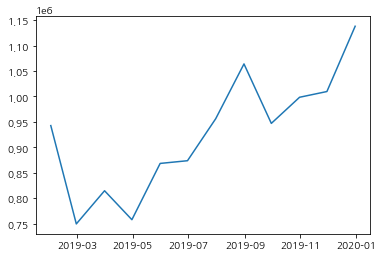

In [475]:
#월별 판매수량 그래프
plt.plot(ddf7_2)

In [476]:
ddf7_2.sort_values(by='sale',ascending=False)

,sale
datetime,
2019-12-31,1.137931e+06
2019-08-31,1.063865e+06
2019-11-30,1.009593e+06
2019-10-31,9.983252e+05
2019-07-31,9.562296e+05
2019-09-30,9.469881e+05
2019-01-31,9.426386e+05
2019-06-30,8.735824e+05
2019-05-31,8.682594e+05


In [477]:
#상품군별 판매수량
q=ddf7['sale'].groupby(ddf7['type']).sum()

DataFrame(q)


,sale
type,
가구,4.142085e+04
가전,9.154946e+04
건강기능,2.944618e+05
농수축,3.776003e+06
생활용품,4.984929e+05
속옷,1.425039e+06
의류,1.666378e+06
이미용,1.046214e+06
잡화,9.235444e+05


In [478]:
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


In [479]:
q=DataFrame(q)
q=q.reset_index()
q.sale

0     4.142085e+04
1     9.154946e+04
2     2.944618e+05
3     3.776003e+06
4     4.984929e+05
5     1.425039e+06
6     1.666378e+06
7     1.046214e+06
8     9.235444e+05
9     1.252903e+06
10    1.029635e+05
Name: sale, dtype: float64

<AxesSubplot:xlabel='type', ylabel='sale'>

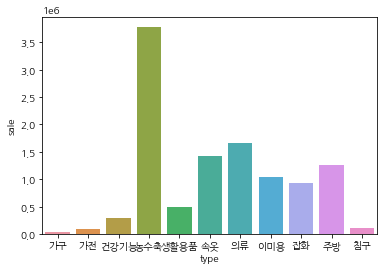

In [480]:
#상품군별 판매수량 그래프 1
sns.barplot(data=q,x="type",y="sale")

In [481]:
q.sort_values(by='sale',ascending=False)


,type,sale
3,농수축,3.776003e+06
6,의류,1.666378e+06
5,속옷,1.425039e+06
9,주방,1.252903e+06
7,이미용,1.046214e+06
8,잡화,9.235444e+05
4,생활용품,4.984929e+05
2,건강기능,2.944618e+05
10,침구,1.029635e+05
1,가전,9.154946e+04


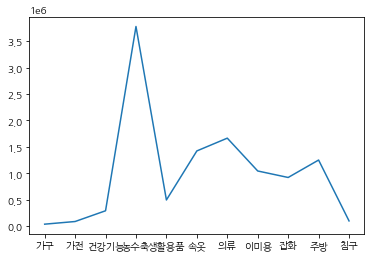

In [482]:
#상품군별 판매수량 그래프 2
q=ddf7['sale'].groupby(ddf7['type']).sum()

plt.plot(q)


In [483]:
ddf7_1=DataFrame(ddf7_1)
ddf7_1

,sale
datetime,
2019-01-01 06:00:00,819.448622
2019-01-01 07:00:00,811.491525
2019-01-01 08:00:00,1665.041736
2019-01-01 09:00:00,1151.556962
2019-01-01 10:00:00,3250.037547
...,...
2019-12-31 19:00:00,155.702800
2019-12-31 20:00:00,761.891640
2019-12-31 21:00:00,158.117802


In [484]:
ddf7_1=ddf7_1.reset_index()
ddf7_1

,datetime,sale
0,2019-01-01 06:00:00,819.448622
1,2019-01-01 07:00:00,811.491525
2,2019-01-01 08:00:00,1665.041736
3,2019-01-01 09:00:00,1151.556962
4,2019-01-01 10:00:00,3250.037547
...,...,...
8749,2019-12-31 19:00:00,155.702800
8750,2019-12-31 20:00:00,761.891640
8751,2019-12-31 21:00:00,158.117802
8752,2019-12-31 22:00:00,0.000000


In [485]:
ddf7_1['datetime'] = ddf7_1['datetime'].astype(str)

In [486]:
a=ddf7_1.loc[ddf7_1['datetime'].str.contains('06:00:00',na=False)].sum()
b=ddf7_1.loc[ddf7_1['datetime'].str.contains('07:00:00',na=False)].sum()
c=ddf7_1.loc[ddf7_1['datetime'].str.contains('08:00:00',na=False)].sum()
d=ddf7_1.loc[ddf7_1['datetime'].str.contains('09:00:00',na=False)].sum()
e=ddf7_1.loc[ddf7_1['datetime'].str.contains('10:00:00',na=False)].sum()
f=ddf7_1.loc[ddf7_1['datetime'].str.contains('11:00:00',na=False)].sum()
g=ddf7_1.loc[ddf7_1['datetime'].str.contains('12:00:00',na=False)].sum()
h=ddf7_1.loc[ddf7_1['datetime'].str.contains('13:00:00',na=False)].sum()
i=ddf7_1.loc[ddf7_1['datetime'].str.contains('14:00:00',na=False)].sum()
j=ddf7_1.loc[ddf7_1['datetime'].str.contains('15:00:00',na=False)].sum()
k=ddf7_1.loc[ddf7_1['datetime'].str.contains('16:00:00',na=False)].sum()
l=ddf7_1.loc[ddf7_1['datetime'].str.contains('17:00:00',na=False)].sum()
m=ddf7_1.loc[ddf7_1['datetime'].str.contains('18:00:00',na=False)].sum()
n=ddf7_1.loc[ddf7_1['datetime'].str.contains('19:00:00',na=False)].sum()
o=ddf7_1.loc[ddf7_1['datetime'].str.contains('20:00:00',na=False)].sum()
p=ddf7_1.loc[ddf7_1['datetime'].str.contains('21:00:00',na=False)].sum()
q=ddf7_1.loc[ddf7_1['datetime'].str.contains('22:00:00',na=False)].sum()
r=ddf7_1.loc[ddf7_1['datetime'].str.contains('23:00:00',na=False)].sum()
s=ddf7_1.loc[ddf7_1['datetime'].str.contains('00:00:00',na=False)].sum()

In [487]:
a

datetime    2019-01-01 06:00:002019-01-02 06:00:002019-01-...
sale                                                   362132
dtype: object

In [488]:
#시간대별(1시간단위) 판매수량
df3=pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s], axis=1)
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
datetime,2019-01-01 06:00:002019-01-02 06:00:002019-01-...,2019-01-01 07:00:002019-01-02 07:00:002019-01-...,2019-01-01 08:00:002019-01-02 08:00:002019-01-...,2019-01-01 09:00:002019-01-02 09:00:002019-01-...,2019-01-01 10:00:002019-01-02 10:00:002019-01-...,2019-01-01 11:00:002019-01-02 11:00:002019-01-...,2019-01-01 12:00:002019-01-02 12:00:002019-01-...,2019-01-01 13:00:002019-01-02 13:00:002019-01-...,2019-01-01 14:00:002019-01-02 14:00:002019-01-...,2019-01-01 15:00:002019-01-02 15:00:002019-01-...,2019-01-01 16:00:002019-01-02 16:00:002019-01-...,2019-01-01 17:00:002019-01-02 17:00:002019-01-...,2019-01-01 18:00:002019-01-02 18:00:002019-01-...,2019-01-01 19:00:002019-01-02 19:00:002019-01-...,2019-01-01 20:00:002019-01-02 20:00:002019-01-...,2019-01-01 21:00:002019-01-02 21:00:002019-01-...,2019-01-01 22:00:002019-01-02 22:00:002019-01-...,2019-01-01 23:00:002019-01-02 23:00:002019-01-...,2019-01-02 00:00:002019-01-03 00:00:002019-01-...
sale,362132,585836,566916,630408,628077,658176,539998,657551,643585,692094,1.01155e+06,977699,722616,515030,492163,311617,289725,290097,288939


In [489]:
df3.reset_index(level=[0], inplace = True)


In [490]:
df3

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,datetime,2019-01-01 06:00:002019-01-02 06:00:002019-01-...,2019-01-01 07:00:002019-01-02 07:00:002019-01-...,2019-01-01 08:00:002019-01-02 08:00:002019-01-...,2019-01-01 09:00:002019-01-02 09:00:002019-01-...,2019-01-01 10:00:002019-01-02 10:00:002019-01-...,2019-01-01 11:00:002019-01-02 11:00:002019-01-...,2019-01-01 12:00:002019-01-02 12:00:002019-01-...,2019-01-01 13:00:002019-01-02 13:00:002019-01-...,2019-01-01 14:00:002019-01-02 14:00:002019-01-...,2019-01-01 15:00:002019-01-02 15:00:002019-01-...,2019-01-01 16:00:002019-01-02 16:00:002019-01-...,2019-01-01 17:00:002019-01-02 17:00:002019-01-...,2019-01-01 18:00:002019-01-02 18:00:002019-01-...,2019-01-01 19:00:002019-01-02 19:00:002019-01-...,2019-01-01 20:00:002019-01-02 20:00:002019-01-...,2019-01-01 21:00:002019-01-02 21:00:002019-01-...,2019-01-01 22:00:002019-01-02 22:00:002019-01-...,2019-01-01 23:00:002019-01-02 23:00:002019-01-...,2019-01-02 00:00:002019-01-03 00:00:002019-01-...
1,sale,362132,585836,566916,630408,628077,658176,539998,657551,643585,692094,1.01155e+06,977699,722616,515030,492163,311617,289725,290097,288939


In [491]:
c1=['06:00:00','07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00','22:00:00','23:00:00','00:00:00']
c2=[362132,585836,566916,630408,628077,658176,539998,657551,643585,692094,1.01155e+06,977699,722616,515030,492163,311617,289725,290097,288939]
dd=pd.DataFrame(c1,c2)
dd
dd1=dd.T
dd1=dd1.T
dd1

,0
362132.0,06:00:00
585836.0,07:00:00
566916.0,08:00:00
630408.0,09:00:00
628077.0,10:00:00
658176.0,11:00:00
539998.0,12:00:00
657551.0,13:00:00
643585.0,14:00:00
692094.0,15:00:00


In [492]:
dd1.reset_index(level=[0], inplace = True)
dd1

,index,0
0,362132.0,06:00:00
1,585836.0,07:00:00
2,566916.0,08:00:00
3,630408.0,09:00:00
4,628077.0,10:00:00
5,658176.0,11:00:00
6,539998.0,12:00:00
7,657551.0,13:00:00
8,643585.0,14:00:00
9,692094.0,15:00:00


In [493]:
dd1.columns=['sale','hour']

In [494]:
dd1=dd1[['hour','sale']]

In [495]:
#시간대별 판매수량
dd1

,hour,sale
0,06:00:00,362132.0
1,07:00:00,585836.0
2,08:00:00,566916.0
3,09:00:00,630408.0
4,10:00:00,628077.0
5,11:00:00,658176.0
6,12:00:00,539998.0
7,13:00:00,657551.0
8,14:00:00,643585.0
9,15:00:00,692094.0


[Text(0.5, 0, '시간대'), Text(0, 0.5, '판매수량'), Text(0.5, 1.0, '시간대별 판매수량')]

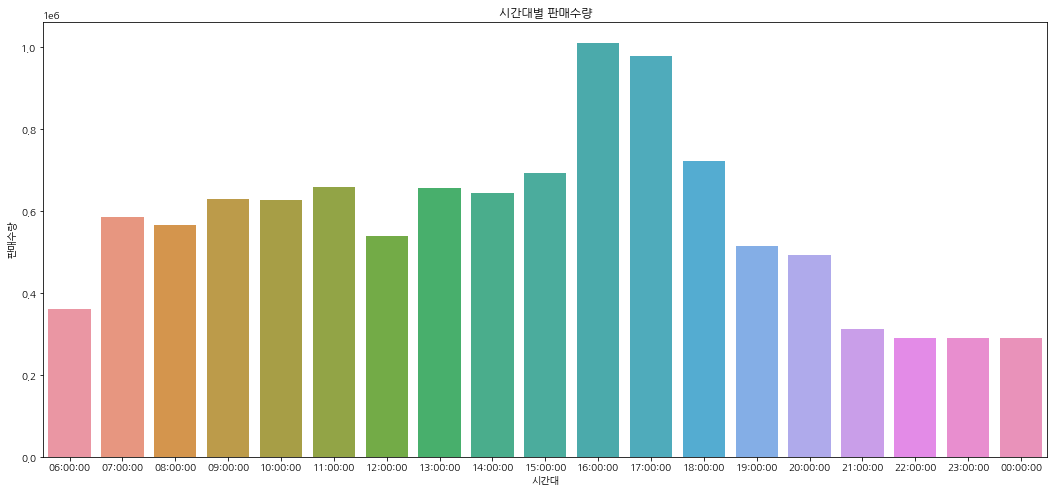

In [496]:
#시간대별 판매수량 그래프 1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(18,8)
sns.barplot(data=dd1,x="hour",y="sale")
ax1.set(xlabel='시간대',ylabel='판매수량',title='시간대별 판매수량')

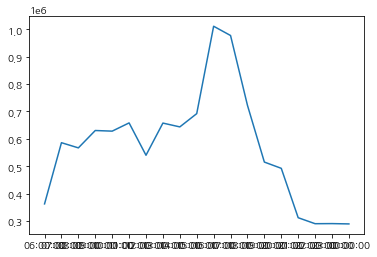

In [497]:
#시간대별 판매수량 그래프2
fig,ax=plt.subplots(1,1)
ax.plot(dd1['hour'],dd1['sale'])

In [498]:
dd1.sort_values(by='sale',ascending=False)

,hour,sale
10,16:00:00,1011550.0
11,17:00:00,977699.0
12,18:00:00,722616.0
9,15:00:00,692094.0
5,11:00:00,658176.0
7,13:00:00,657551.0
8,14:00:00,643585.0
3,09:00:00,630408.0
4,10:00:00,628077.0
1,07:00:00,585836.0


In [499]:
grouped=ddf7['sale'].groupby(ddf7['exp'])
grouped

In [500]:
time_ddf7=grouped.mean()
time_ddf7
time_ddf7=DataFrame(time_ddf7)
time_ddf7=time_ddf7.reset_index()


[Text(0.5, 0, '노출(분)'), Text(0, 0.5, '판매수량'), Text(0.5, 1.0, '노출시간별 판매수량')]

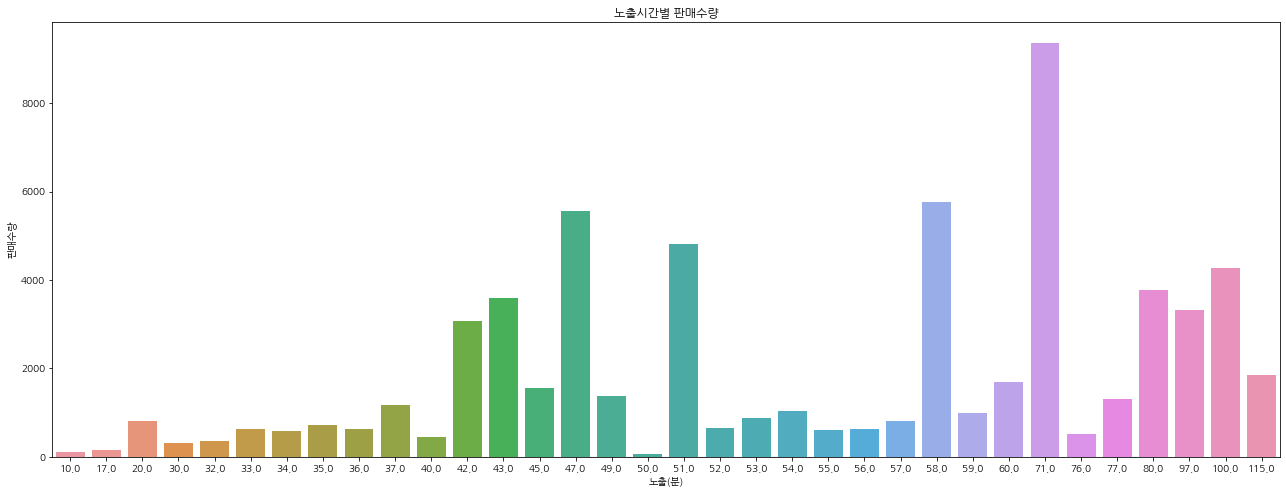

In [501]:
#노출시간별 판매수량 그래프1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(22,8)
sns.barplot(data=time_ddf7,x="exp",y="sale",ax=ax1)
ax1.set(xlabel='노출(분)',ylabel='판매수량',title='노출시간별 판매수량')

In [502]:
time_ddf7.sort_values(by='sale',ascending=False)

,exp,sale
27,71.0,9371.404682
24,58.0,5773.132381
14,47.0,5567.865903
17,51.0,4819.265197
32,100.0,4281.423718
30,80.0,3781.473387
12,43.0,3589.264590
31,97.0,3315.538847
11,42.0,3077.424749
33,115.0,1855.669464


In [503]:
grouped=ddf7['sale'].groupby(ddf7['exp'])
grouped
time_ddf7=grouped.mean()
time_ddf7

exp
10.0      111.871795
17.0      163.967386
20.0      813.702545
30.0      301.370772
32.0      360.860197
33.0      628.603438
34.0      589.899833
35.0      727.530248
36.0      623.314911
37.0     1166.426791
40.0      445.917367
42.0     3077.424749
43.0     3589.264590
45.0     1546.213983
47.0     5567.865903
49.0     1386.655518
50.0       72.718881
51.0     4819.265197
52.0      644.918122
53.0      877.078953
54.0     1025.334821
55.0      617.175411
56.0      624.638244
57.0      815.611118
58.0     5773.132381
59.0      985.661016
60.0     1690.594505
71.0     9371.404682
76.0      524.563260
77.0     1317.194389
80.0     3781.473387
97.0     3315.538847
100.0    4281.423718
115.0    1855.669464
Name: sale, dtype: float64

Text(0, 0.5, '판매수량')

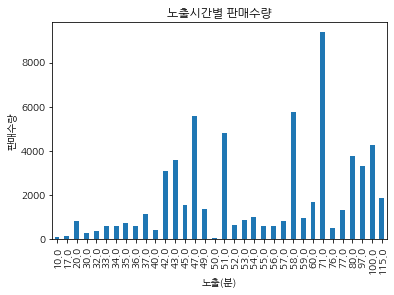

In [504]:
#노출시간별 판매수량 그래프2

ax = time_ddf7.plot(kind='bar', title='노출시간별 판매수량')
ax.set_xlabel('노출(분)')        
ax.set_ylabel('판매수량')

In [505]:
grouped=ddf7['sale'].groupby(ddf7['price'])
grouped

In [506]:
p=grouped.mean()
p
p=DataFrame(p)
p=p.reset_index()
p

,price,sale
0,29000.0,3140.611330
1,29800.0,3640.693026
2,29900.0,3696.200297
3,30900.0,4458.868864
4,32400.0,1876.099586
...,...,...
514,2992500.0,36.643422
515,3150000.0,12.232310
516,3220500.0,32.681192
517,3377000.0,32.676137


[Text(0.5, 0, '판매단가'), Text(0, 0.5, '판매수량'), Text(0.5, 1.0, '판매단가별 판매수량')]

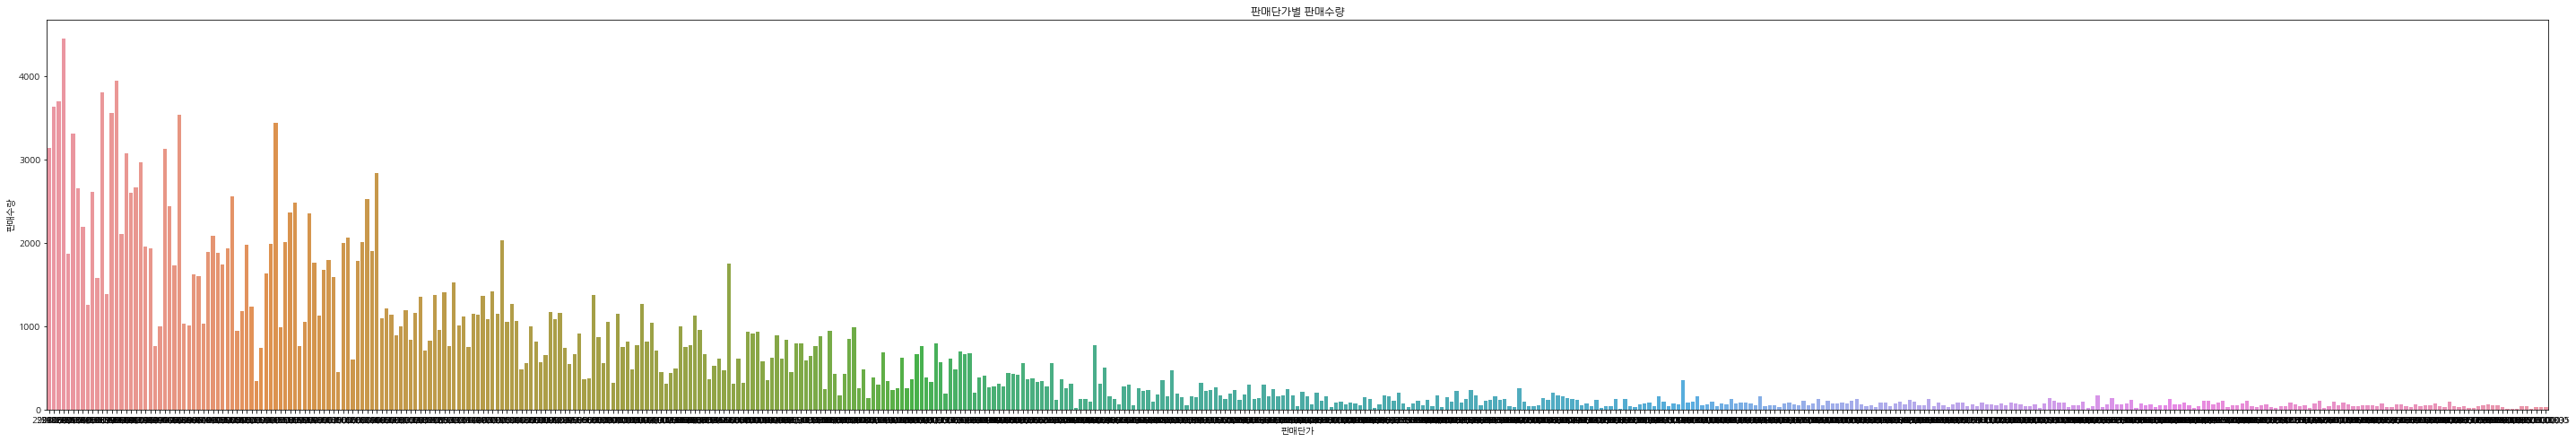

In [507]:
#판매단가별 판매수량 그래프1

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(50,8)
sns.barplot(data=p,x="price",y="sale",ax=ax1)
ax1.set(xlabel='판매단가',ylabel='판매수량',title='판매단가별 판매수량')

In [508]:
p.sort_values(by='sale',ascending=False)

,price,sale
3,30900.0,4458.868864
14,38900.0,3945.548163
11,35000.0,3807.011429
2,29900.0,3696.200297
1,29800.0,3640.693026
...,...,...
326,1250000.0,13.496211
511,2749000.0,12.614772
510,2609000.0,12.595604
515,3150000.0,12.232310


In [509]:
grouped=ddf7['sale'].groupby(ddf7['price'])
grouped
p=grouped.mean()
p

price
29000.0      3140.611330
29800.0      3640.693026
29900.0      3696.200297
30900.0      4458.868864
32400.0      1876.099586
                ...     
2992500.0      36.643422
3150000.0      12.232310
3220500.0      32.681192
3377000.0      32.676137
3390000.0      30.642025
Name: sale, Length: 519, dtype: float64

Text(0.5, 0, 'price')

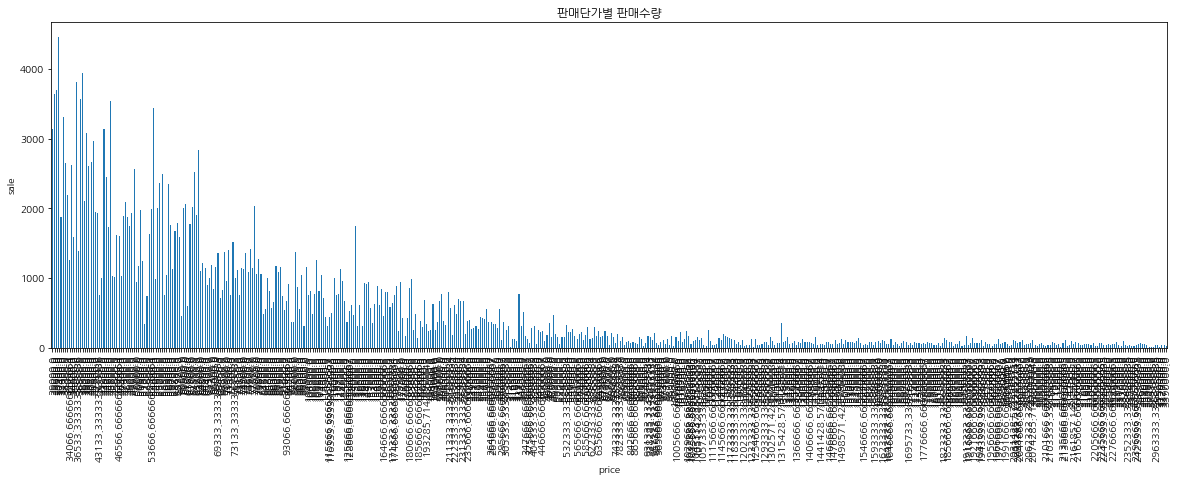

In [510]:
#판매단가별 판매수량 그래프2

ax = p.plot(kind='bar', title='판매단가별 판매수량',figsize=(20,6))
       
ax.set_ylabel('sale')
ax.set_xlabel('price')

## 정리

- 월별 판매량은 12월이 가장 크고 그 뒤로 8,11,10,7월이 큼.  가장 적은 달은 2월
- 상품군별 판매량은 농수축이 가장 크고 그 뒤로 의류, 속옷, 주방, 이미용이 큼.   가장 적은 상품군은 가구
- 시간대별 판매량은 16시가 가장 크고 그 뒤로 17시, 18시, 15시, 11시(오전)이 큼.   가장 적은 시간대는 00시
- 노출시간(분)별 판매량은 71분이 가장 크고 그 뒤로 58분, 47분, 51분, 100분이 큼.   가장 적은 노출시간은 50분
- 판매단가별 판매량은 30,900원이 가장 크고 그 뒤로 38,900원, 35,000원, 29,900원, 29,800원이 큼.   가장 적은 판매단가는 2,831,000원



## ***8/30 이후 추가 됨 ↓

In [511]:
ddf7_2.head()

,sale
datetime,
2019-01-31,942638.621719
2019-02-28,749350.831486
2019-03-31,814560.783836
2019-04-30,757645.062614
2019-05-31,868259.395082


In [512]:
#ddf7_2.to_csv("month.csv")

In [513]:
ddf7.head()

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547


In [514]:
#ddf7.tail()

In [515]:
#ddf7.to_csv("최종정리.csv")

In [516]:
#날짜 다시 datetime형으로 바꿔주기

ddf7['datetime'] = ddf7['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M:%S'))

In [517]:
ddf7

,datetime,exp,mcode,type,price,amount,sale
datetime,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547
...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640


In [518]:
#날짜 추가

ddf7['day']=ddf7['datetime'].dt.day_name()

In [519]:
ddf7.head(100)

,datetime,exp,mcode,type,price,amount,sale,day
datetime,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,3.990000e+04,32696000.0,819.448622,Tuesday
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,5.900000e+04,47878000.0,811.491525,Tuesday
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,5.990000e+04,99736000.0,1665.041736,Tuesday
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,7.900000e+04,90973000.0,1151.556962,Tuesday
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,7.990000e+04,259678000.0,3250.037547,Tuesday
...,...,...,...,...,...,...,...,...
2019-01-05 20:00:00,2019-01-05 20:00:00,60.0,100610,속옷,8.900000e+04,90011000.0,1011.359551,Saturday
2019-01-05 21:00:00,2019-01-05 21:00:00,60.0,100148,가전,1.776667e+06,270378000.0,142.804928,Saturday
2019-01-05 22:00:00,2019-01-05 22:00:00,60.0,100607,속옷,1.190000e+05,171008000.0,1437.042017,Saturday


In [520]:
#휴일 여부 이산형으로 표시 (0:주중, 1:휴일(토,일))

holiday=[]

# 열에 추가할 각 행을 For로 순회합니다, 
for row in ddf7['day']: 
    if row == "Saturday": 
        holiday.append('1') 
    elif row == "Sunday": 
        holiday.append('1')
    else:
        holiday.append('0')
ddf7['holiday'] = holiday

In [521]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747,Tuesday,0
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800,Tuesday,0
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640,Tuesday,0


In [522]:
ddf7.head(100)

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,3.990000e+04,32696000.0,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,5.900000e+04,47878000.0,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,5.990000e+04,99736000.0,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,7.900000e+04,90973000.0,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,7.990000e+04,259678000.0,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-01-05 20:00:00,2019-01-05 20:00:00,60.0,100610,속옷,8.900000e+04,90011000.0,1011.359551,Saturday,1
2019-01-05 21:00:00,2019-01-05 21:00:00,60.0,100148,가전,1.776667e+06,270378000.0,142.804928,Saturday,1
2019-01-05 22:00:00,2019-01-05 22:00:00,60.0,100607,속옷,1.190000e+05,171008000.0,1437.042017,Saturday,1


In [523]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday
datetime,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525,Tuesday,0
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736,Tuesday,0
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962,Tuesday,0
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547,Tuesday,0
...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747,Tuesday,0
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800,Tuesday,0
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640,Tuesday,0


In [524]:
#휴일 여부에 따른 판매수량 

hol=ddf7['sale'].groupby(ddf7['holiday']).sum()


In [525]:
hol=DataFrame(hol)
hol=hol.reset_index()
hol

,holiday,sale
0,0,7.694394e+06
1,1,3.424576e+06


<AxesSubplot:xlabel='holiday', ylabel='sale'>

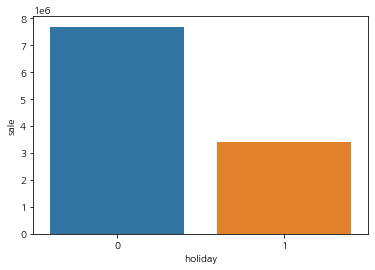

In [526]:
#휴일 여부별 판매수량 그래프

sns.barplot(data=hol, x="holiday", y="sale")

<AxesSubplot:xlabel='type', ylabel='sale'>

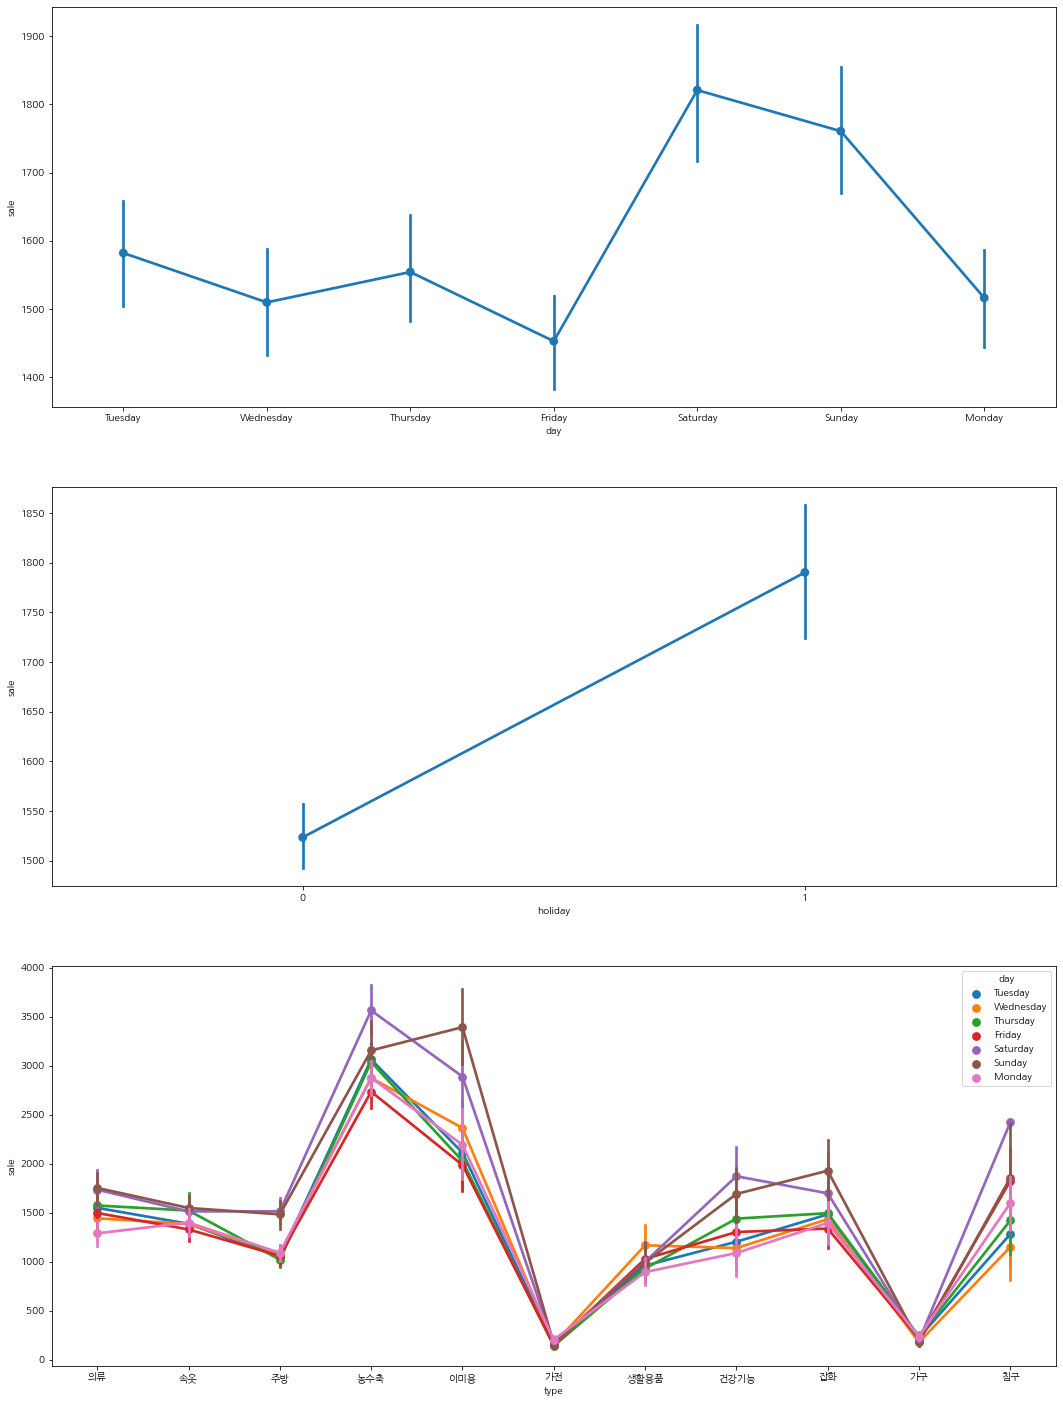

In [527]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(18,25)
sns.pointplot(data=ddf7, x="day", y="sale", ax=ax1,title="요일별 판매수량")  #요일별 판매수량 그래프

sns.pointplot(data=ddf7, x="holiday", y="sale", ax=ax2, title="평일, 주말 판매수량")  #휴일 여부별 판매수량 그래프 2

sns.pointplot(data=ddf7, x="type", y="sale", hue="day",ax=ax3,title="요일에 따른 상품군별 판매수량") #요일에 따른 상품군별 판매수량 그래프


In [528]:
#노출 시간 범주 나누기

ex=[]
#40분 미만은 1, 41분~45분은 2, 46~50은 3, 51~55는 4 56~60은 5, 61~65는 6 67 
for row in ddf7['exp']: 
    if row <40 : 
        ex.append('40분 미만') 
    elif row>=41 and row<=45 : 
        ex.append('41~45')
    elif row>=46 and row<=50 : 
        ex.append('46~50')
    elif row>=51 and row<=55 : 
        ex.append('51~55')
    elif row>=56 and row<=60 : 
        ex.append('56~60')
    elif row>=61 and row<=65 : 
        ex.append('61~65')
    elif row>=66 and row<=70 : 
        ex.append('66~70')
    elif row>=71 and row<=75 : 
        ex.append('71~75')
    elif row>=76 and row<=80 : 
        ex.append('76~80')
    else:
        ex.append('80분 초과')
        
        
ddf7['exp2'] = ex

In [529]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2
datetime,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0,56~60
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525,Tuesday,0,56~60
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736,Tuesday,0,56~60
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962,Tuesday,0,56~60
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547,Tuesday,0,56~60
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747,Tuesday,0,56~60
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800,Tuesday,0,56~60
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640,Tuesday,0,56~60


In [530]:
#노출시간별 평균 판매수량

expp=ddf7['sale'].groupby(ddf7['exp2']).mean()
expp=DataFrame(expp)

In [531]:
expp=expp.reset_index()

In [532]:
expp

,exp2,sale
0,40분 미만,763.085594
1,41~45,2822.941081
2,46~50,1439.855624
3,51~55,814.835422
4,56~60,1666.074444
5,71~75,9371.404682
6,76~80,3648.422478
7,80분 초과,471.435858


[Text(0.5, 0, '노출시간'), Text(0, 0.5, '판매수량'), Text(0.5, 1.0, '노출시간별 판매수량')]

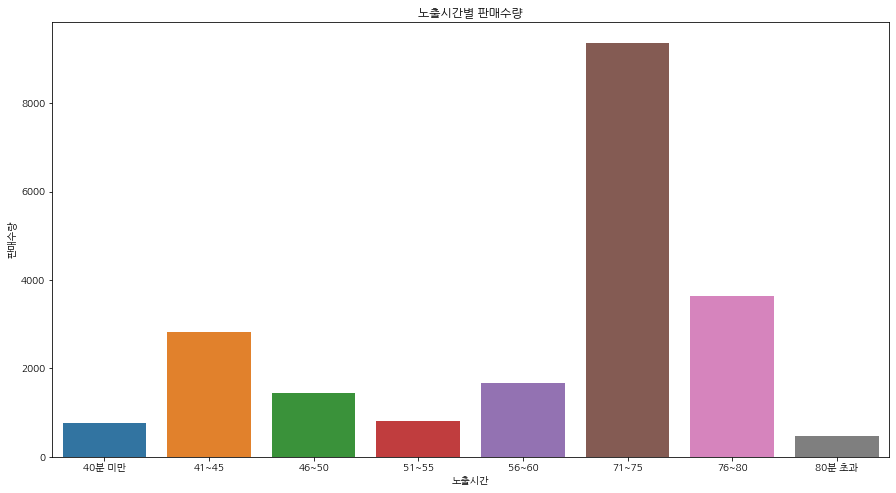

In [533]:
#노출 시간별 평균 판매수량 그래프

figure,(ax1)=plt.subplots(nrows=1,ncols=1)
figure.set_size_inches(15,8)
sns.barplot(data=expp,x="exp2",y="sale",ax=ax1)
ax1.set(xlabel='노출시간',ylabel='판매수량',title='노출시간별 판매수량')

In [534]:
#날씨 데이터 불러오기

import pandas as pd
weader=pd.read_csv("C:/Users/hyeyo/AppData/Local/Programs/Python/Python37-32/기상청.txt", sep=' ')

In [535]:
weader.head()

,날짜,평균기온,최고기온,최저기온,평균운량
0,2019-1-1,-5.0,-0.6,-8.2,0.0
1,2019-1-2,-4.9,0.2,-8.8,0.0
2,2019-1-3,-3.5,3.2,-8.4,0.0
3,2019-1-4,-1.1,4.1,-6.2,0.0
4,2019-1-5,-2.8,1.1,-5.5,0.0


In [536]:
#날씨 데이터의 날짜 datetime 형으로 바꾸기

weader['날짜'] = weader['날짜'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M'))

In [537]:
weader.날짜

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: 날짜, Length: 365, dtype: datetime64[ns]

In [538]:
ddf7['datetime'] = ddf7['datetime'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d %H:%M'))

In [539]:
#ddf7에 date열 추가

ddf7['date'] = ddf7['datetime'].dt.strftime('%Y-%m-%d')

In [540]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2,date
datetime,,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0,56~60,2019-01-01
2019-01-01 07:00:00,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525,Tuesday,0,56~60,2019-01-01
2019-01-01 08:00:00,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736,Tuesday,0,56~60,2019-01-01
2019-01-01 09:00:00,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962,Tuesday,0,56~60,2019-01-01
2019-01-01 10:00:00,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547,Tuesday,0,56~60,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 18:20:00,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747,Tuesday,0,56~60,2019-12-31
2019-12-31 19:20:00,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800,Tuesday,0,56~60,2019-12-31
2019-12-31 20:20:00,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640,Tuesday,0,56~60,2019-12-31


In [541]:
#기상청 데이터에서 날짜랑 일별 평균기온만 빼오기

w=['날짜','평균기온']
weader=weader[w]
weader

,날짜,평균기온
0,2019-01-01,-5.0
1,2019-01-02,-4.9
2,2019-01-03,-3.5
3,2019-01-04,-1.1
4,2019-01-05,-2.8
...,...,...
360,2019-12-27,-1.7
361,2019-12-28,1.1
362,2019-12-29,3.8
363,2019-12-30,2.7


In [542]:
weader.날짜

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-05
         ...    
360   2019-12-27
361   2019-12-28
362   2019-12-29
363   2019-12-30
364   2019-12-31
Name: 날짜, Length: 365, dtype: datetime64[ns]

In [543]:
#ddf7의 date열 datetime형으로 바꾸기

ddf7['date']=ddf7['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [544]:
ddf7.date

datetime
2019-01-01 06:00:00   2019-01-01
2019-01-01 07:00:00   2019-01-01
2019-01-01 08:00:00   2019-01-01
2019-01-01 09:00:00   2019-01-01
2019-01-01 10:00:00   2019-01-01
                         ...    
2019-12-31 18:20:00   2019-12-31
2019-12-31 19:20:00   2019-12-31
2019-12-31 20:20:00   2019-12-31
2019-12-31 21:20:00   2019-12-31
2019-12-31 23:20:00   2019-12-31
Name: date, Length: 6964, dtype: datetime64[ns]

In [545]:
#date를 기준으로 ddf7과 weader합치기

ddf7['date'] = pd.to_datetime(ddf7['date'])
weader['date'] = pd.to_datetime(weader['날짜'])
ddf7_merged = pd.merge_asof(
    ddf7.sort_values(by='date'), weader.sort_values(by='date'),
    on='date')
 

In [546]:
ddf7_merged

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2,date,날짜,평균기온
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0,56~60,2019-01-01,2019-01-01,-5.0
1,2019-01-01 23:00:00,60.0,100718,속옷,89900.0,122537000.0,1363.036707,Tuesday,0,56~60,2019-01-01,2019-01-01,-5.0
2,2019-01-01 22:00:00,60.0,100271,의류,299000.0,115831000.0,387.394649,Tuesday,0,56~60,2019-01-01,2019-01-01,-5.0
3,2019-01-01 21:00:00,60.0,100049,의류,499000.0,154715000.0,310.050100,Tuesday,0,56~60,2019-01-01,2019-01-01,-5.0
4,2019-01-01 20:00:00,60.0,100150,가전,464000.0,284574000.0,619.379823,Tuesday,0,56~60,2019-01-01,2019-01-01,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959,2019-12-31 01:20:00,57.0,100439,속옷,89900.0,58445000.0,650.111235,Tuesday,0,56~60,2019-12-31,2019-12-31,-7.9
6960,2019-12-31 00:20:00,60.0,100320,생활용품,41900.0,82202000.0,1874.880279,Tuesday,0,56~60,2019-12-31,2019-12-31,-7.9
6961,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000.0,158.117802,Tuesday,0,56~60,2019-12-31,2019-12-31,-7.9
6962,2019-12-31 11:20:00,60.0,100253,농수축,30900.0,152853000.0,4946.699029,Tuesday,0,56~60,2019-12-31,2019-12-31,-7.9


In [547]:
#시간이 뒤죽박죽 되어서 다시 정렬

ddf7=ddf7_merged.sort_values(by='datetime')

In [548]:
#필요없어진 date와 날짜 열 제거

ddf7=ddf7.drop(['date','날짜'],axis=1)

In [549]:
#인덱스도 다시 정렬

ddf7=ddf7.reset_index()
ddf7=ddf7.drop(['index'],axis=1)

In [550]:
#날짜에 맞게 기온 추가되었는지 확인

ddf7.head(100)

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2,평균기온
0,2019-01-01 06:00:00,60.0,100346,의류,3.990000e+04,32696000.0,819.448622,Tuesday,0,56~60,-5.0
1,2019-01-01 07:00:00,60.0,100305,속옷,5.900000e+04,47878000.0,811.491525,Tuesday,0,56~60,-5.0
2,2019-01-01 08:00:00,60.0,100808,의류,5.990000e+04,99736000.0,1665.041736,Tuesday,0,56~60,-5.0
3,2019-01-01 09:00:00,60.0,100816,의류,7.900000e+04,90973000.0,1151.556962,Tuesday,0,56~60,-5.0
4,2019-01-01 10:00:00,60.0,100809,의류,7.990000e+04,259678000.0,3250.037547,Tuesday,0,56~60,-5.0
...,...,...,...,...,...,...,...,...,...,...,...
95,2019-01-05 20:00:00,60.0,100610,속옷,8.900000e+04,90011000.0,1011.359551,Saturday,1,56~60,-2.8
96,2019-01-05 21:00:00,60.0,100148,가전,1.776667e+06,270378000.0,142.804928,Saturday,1,56~60,-2.8
97,2019-01-05 22:00:00,60.0,100607,속옷,1.190000e+05,171008000.0,1437.042017,Saturday,1,56~60,-2.8
98,2019-01-05 23:00:00,60.0,100251,의류,6.900000e+04,93373000.0,1353.231884,Saturday,1,56~60,-2.8


In [551]:
ddf7

,datetime,exp,mcode,type,price,amount,sale,day,holiday,exp2,평균기온
0,2019-01-01 06:00:00,60.0,100346,의류,39900.0,32696000.0,819.448622,Tuesday,0,56~60,-5.0
1,2019-01-01 07:00:00,60.0,100305,속옷,59000.0,47878000.0,811.491525,Tuesday,0,56~60,-5.0
2,2019-01-01 08:00:00,60.0,100808,의류,59900.0,99736000.0,1665.041736,Tuesday,0,56~60,-5.0
3,2019-01-01 09:00:00,60.0,100816,의류,79000.0,90973000.0,1151.556962,Tuesday,0,56~60,-5.0
4,2019-01-01 10:00:00,60.0,100809,의류,79900.0,259678000.0,3250.037547,Tuesday,0,56~60,-5.0
...,...,...,...,...,...,...,...,...,...,...,...
6959,2019-12-31 18:20:00,60.0,100356,의류,79000.0,201322000.0,2548.379747,Tuesday,0,56~60,-7.9
6960,2019-12-31 19:20:00,60.0,100594,가구,649000.0,102360000.0,155.702800,Tuesday,0,56~60,-7.9
6961,2019-12-31 20:20:00,60.0,100501,생활용품,333500.0,191710000.0,761.891640,Tuesday,0,56~60,-7.9
6962,2019-12-31 21:20:00,60.0,100155,가전,1429000.0,222022000.0,158.117802,Tuesday,0,56~60,-7.9
